In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('data/crop_yield.csv')

#### Columns Description:
1. Crop: The name of the crop cultivated.
2. Crop_Year: The year in which the crop was grown.
3. Season: The specific cropping season (e.g., Kharif, Rabi, Whole Year).
4. State: The Indian state where the crop was cultivated.
5. Area: The total land area (in hectares) under cultivation for the specific crop.
6. Production: The quantity of crop production (in metric tons).
7. Annual_Rainfall: The annual rainfall received in the crop-growing region (in mm).
8. Fertilizer: The total amount of fertilizer used for the crop (in kilograms).
9. Pesticide: The total amount of pesticide used for the crop (in kilograms).
10. Yield: The calculated crop yield (production per unit area).

In [4]:
df.head()

,Crop,Crop_Year,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
0,Arecanut,1997,Whole Year,Assam,73814.0,56708,2051.4,7024878.38,22882.34,0.796087
1,Arhar/Tur,1997,Kharif,Assam,6637.0,4685,2051.4,631643.29,2057.47,0.710435
2,Castor seed,1997,Kharif,Assam,796.0,22,2051.4,75755.32,246.76,0.238333
3,Coconut,1997,Whole Year,Assam,19656.0,126905000,2051.4,1870661.52,6093.36,5238.051739
4,Cotton(lint),1997,Kharif,Assam,1739.0,794,2051.4,165500.63,539.09,0.420909


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19689 entries, 0 to 19688
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Crop             19689 non-null  object 
 1   Crop_Year        19689 non-null  int64  
 2   Season           19689 non-null  object 
 3   State            19689 non-null  object 
 4   Area             19689 non-null  float64
 5   Production       19689 non-null  int64  
 6   Annual_Rainfall  19689 non-null  float64
 7   Fertilizer       19689 non-null  float64
 8   Pesticide        19689 non-null  float64
 9   Yield            19689 non-null  float64
dtypes: float64(5), int64(2), object(3)
memory usage: 1.5+ MB


In [6]:
df.describe()

,Crop_Year,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
count,19689.000000,1.968900e+04,1.968900e+04,19689.000000,1.968900e+04,1.968900e+04,19689.000000
mean,2009.127584,1.799266e+05,1.643594e+07,1437.755177,2.410331e+07,4.884835e+04,79.954009
std,6.498099,7.328287e+05,2.630568e+08,816.909589,9.494600e+07,2.132874e+05,878.306193
min,1997.000000,5.000000e-01,0.000000e+00,301.300000,5.417000e+01,9.000000e-02,0.000000
25%,2004.000000,1.390000e+03,1.393000e+03,940.700000,1.880146e+05,3.567000e+02,0.600000
50%,2010.000000,9.317000e+03,1.380400e+04,1247.600000,1.234957e+06,2.421900e+03,1.030000
75%,2015.000000,7.511200e+04,1.227180e+05,1643.700000,1.000385e+07,2.004170e+04,2.388889
max,2020.000000,5.080810e+07,6.326000e+09,6552.700000,4.835407e+09,1.575051e+07,21105.000000


In [7]:
df.isnull().sum()

Crop               0
Crop_Year          0
Season             0
State              0
Area               0
Production         0
Annual_Rainfall    0
Fertilizer         0
Pesticide          0
Yield              0
dtype: int64

In [8]:
numerical_features = [feature for feature in df.columns if df[feature].dtypes != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtypes == 'O']

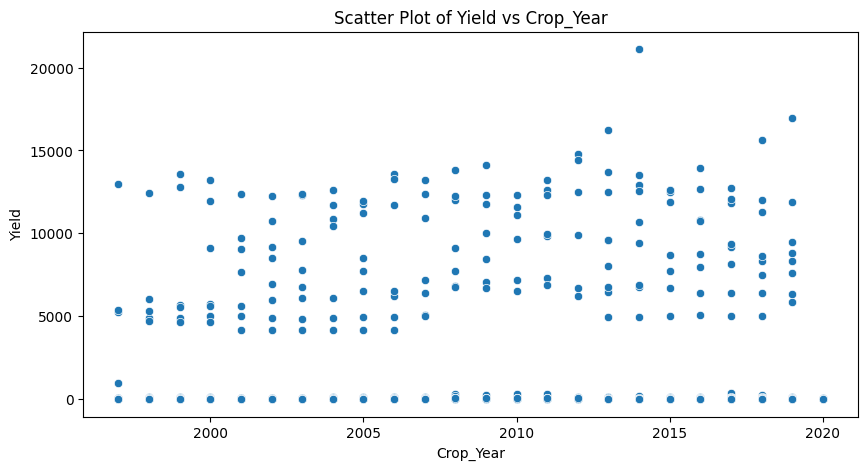

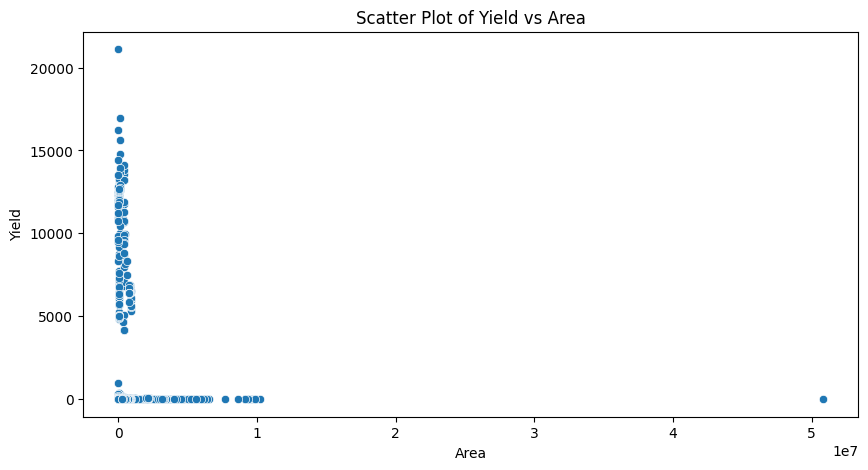

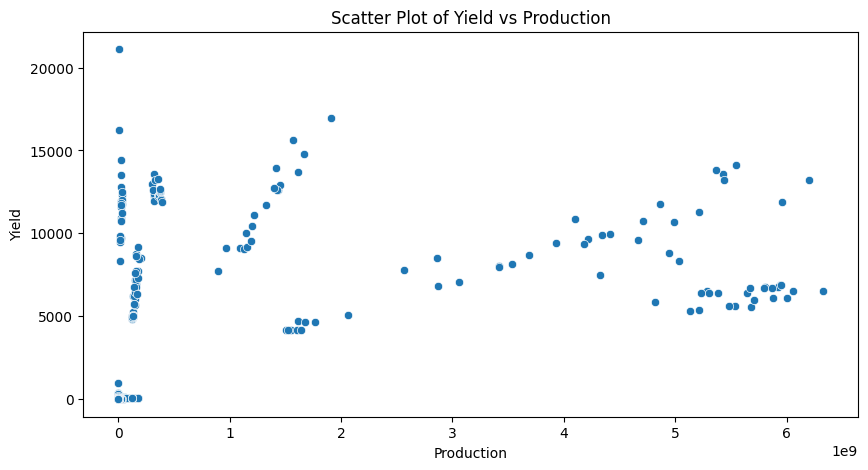

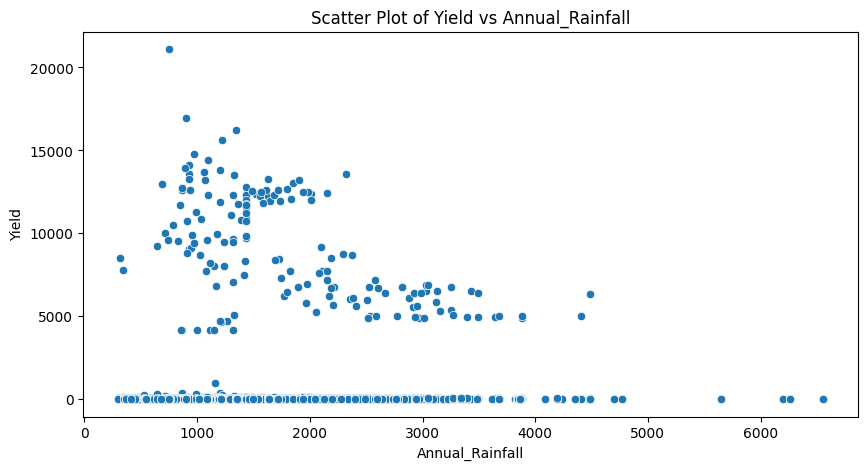

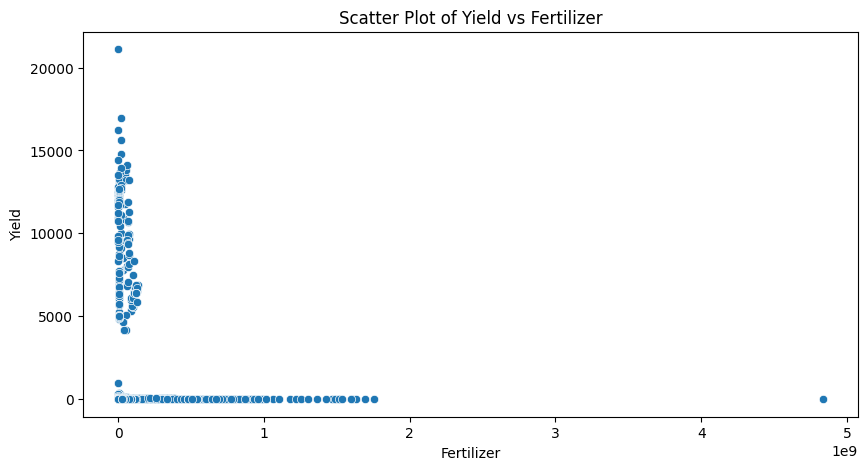

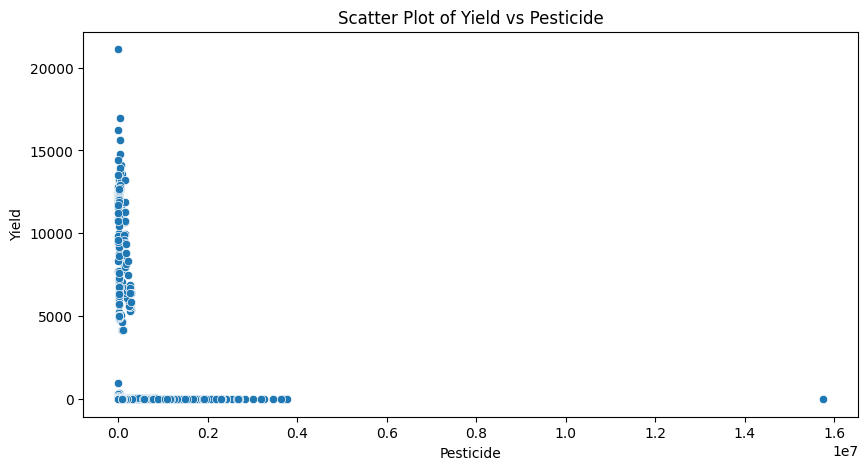

In [9]:
for feature in numerical_features:
    if feature != 'Yield':
        plt.figure(figsize=(10, 5))
        sns.scatterplot(x=df[feature], y=df['Yield'])
        plt.title(f'Scatter Plot of Yield vs {feature}')
        plt.show()



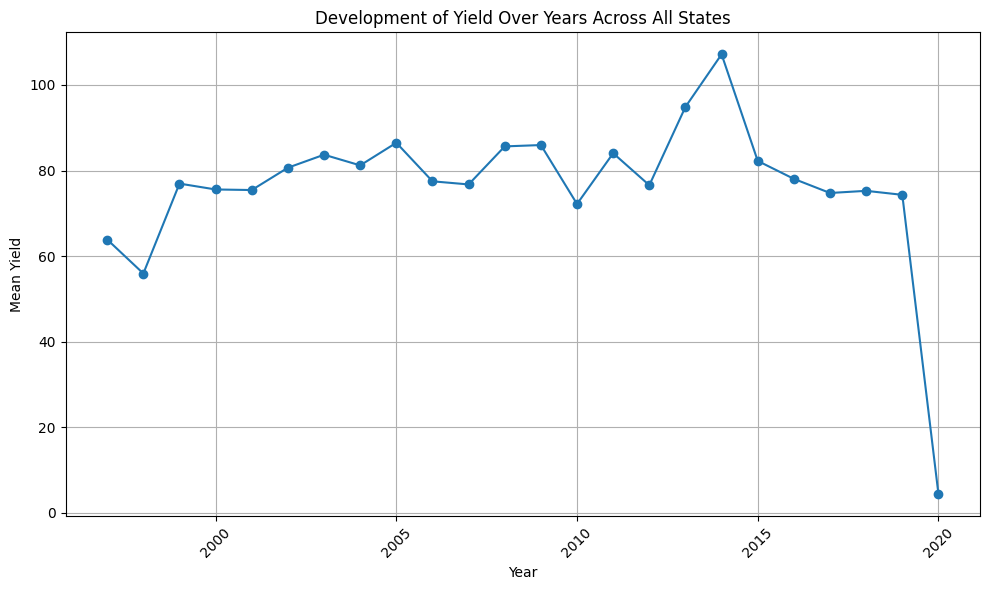

In [10]:
yearly_yield = df.groupby('Crop_Year')['Yield'].mean().reset_index()

plt.figure(figsize=(10, 6))
plt.plot(yearly_yield['Crop_Year'], yearly_yield['Yield'], marker='o', linestyle='-')
plt.title('Development of Yield Over Years Across All States')
plt.xlabel('Year')
plt.ylabel('Mean Yield')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Looking at Categorical Data

30

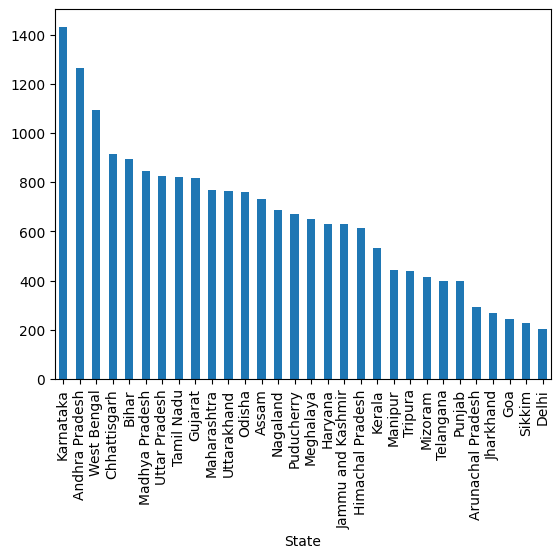

In [12]:
df['State'].value_counts().plot(kind="bar")
df['State'].nunique()

6

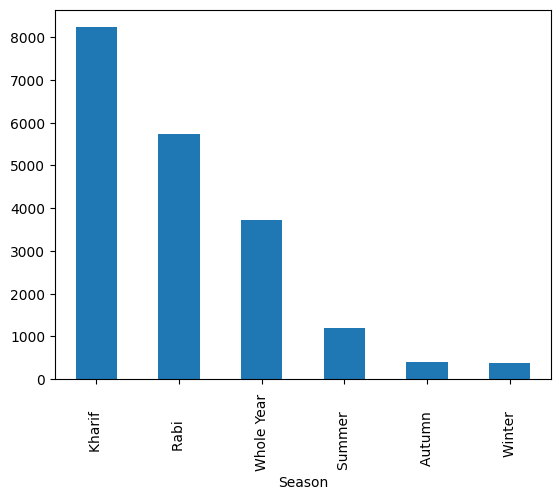

In [13]:
df['Season'].value_counts().plot(kind="bar")
df['Season'].nunique()

In [3]:
df['State'].value_counts()

State
Karnataka            1432
Andhra Pradesh       1266
West Bengal          1094
Chhattisgarh          915
Bihar                 896
Madhya Pradesh        845
Uttar Pradesh         825
Tamil Nadu            822
Gujarat               817
Maharashtra           770
Uttarakhand           764
Odisha                760
Assam                 731
Nagaland              689
Puducherry            670
Meghalaya             649
Haryana               631
Jammu and Kashmir     631
Himachal Pradesh      616
Kerala                534
Manipur               444
Tripura               441
Mizoram               416
Telangana             397
Punjab                397
Arunachal Pradesh     292
Jharkhand             270
Goa                   246
Sikkim                226
Delhi                 203
Name: count, dtype: int64

55

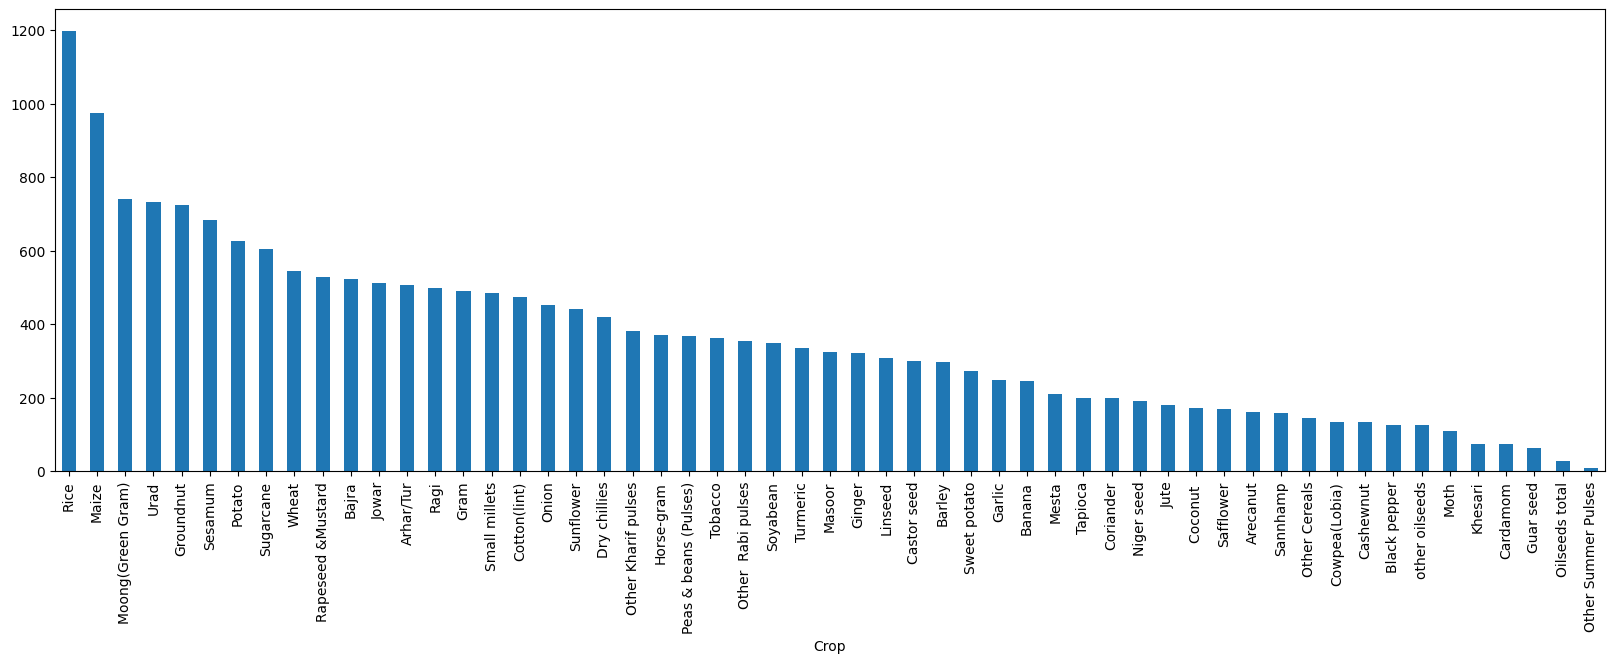

In [16]:
df['Crop'].value_counts().plot(kind="bar",figsize=(20, 6))
df['Crop'].nunique()

In [17]:
df['Crop'].value_counts()

Crop
Rice                     1197
Maize                     975
Moong(Green Gram)         740
Urad                      733
Groundnut                 725
Sesamum                   685
Potato                    628
Sugarcane                 605
Wheat                     545
Rapeseed &Mustard         528
Bajra                     524
Jowar                     513
Arhar/Tur                 508
Ragi                      498
Gram                      490
Small millets             485
Cotton(lint)              476
Onion                     454
Sunflower                 441
Dry chillies              419
Other Kharif pulses       382
Horse-gram                371
Peas & beans (Pulses)     369
Tobacco                   364
Other  Rabi pulses        355
Soyabean                  349
Turmeric                  337
Masoor                    324
Ginger                    323
Linseed                   308
Castor seed               300
Barley                    297
Sweet potato              273
Garli

In [18]:
# Removing some crop types which are irrelevant
crops_to_remove = ['Other Kharif pulses','Other  Rabi pulses','Other Cereals','other oilseeds','Oilseeds total','Other Summer Pulses']

df = df[~df['Crop'].isin(crops_to_remove)]


In [19]:
df['Crop'].value_counts()

Crop
Rice                     1197
Maize                     975
Moong(Green Gram)         740
Urad                      733
Groundnut                 725
Sesamum                   685
Potato                    628
Sugarcane                 605
Wheat                     545
Rapeseed &Mustard         528
Bajra                     524
Jowar                     513
Arhar/Tur                 508
Ragi                      498
Gram                      490
Small millets             485
Cotton(lint)              476
Onion                     454
Sunflower                 441
Dry chillies              419
Horse-gram                371
Peas & beans (Pulses)     369
Tobacco                   364
Soyabean                  349
Turmeric                  337
Masoor                    324
Ginger                    323
Linseed                   308
Castor seed               300
Barley                    297
Sweet potato              273
Garlic                    250
Banana                    245
Mesta

### Dealing with numerical features

In [20]:
numerical_features = [feature for feature in df.columns if df[feature].dtypes != 'O']


In [21]:
df['Area'].value_counts()

Area
1.0         105
3.0          71
2.0          60
4.0          45
5.0          38
           ... 
96921.0       1
60678.0       1
83765.0       1
39697.0       1
239344.0      1
Name: count, Length: 13203, dtype: int64

In [27]:
df[df['Area'] <= 20000].shape

(10999, 10)

In [25]:
df.shape

(18641, 10)

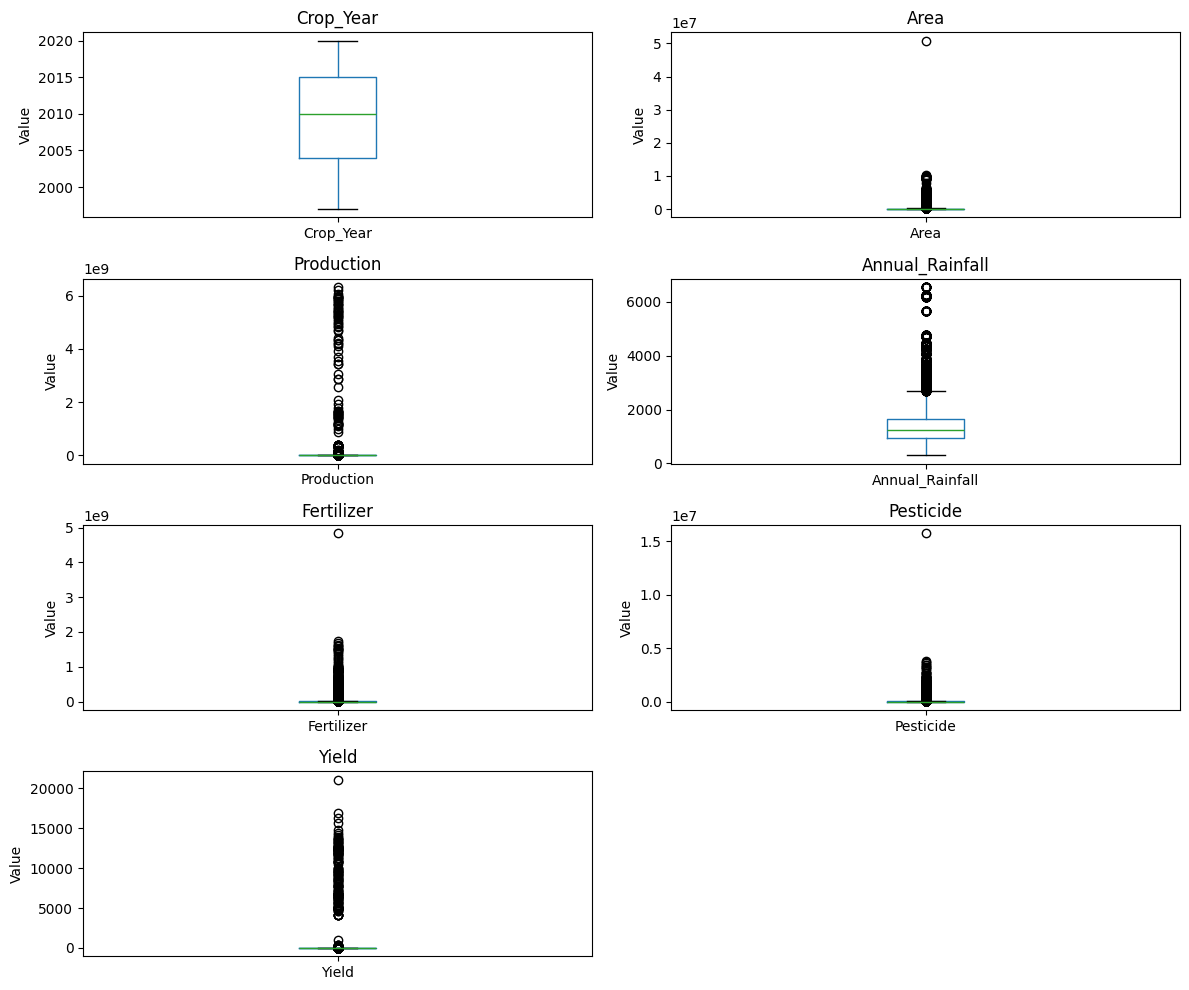

In [22]:
num_rows = 4
num_cols = 2

# Create subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(12, 10))

# Flatten the axes array to iterate over each subplot
axes = axes.flatten()

# Plot boxplots for each numeric column
for i, column in enumerate(numerical_features):
    df.boxplot(column, ax=axes[i], grid=False)
    axes[i].set_title(column)
    axes[i].set_ylabel('Value')

# Remove empty subplots
for j in range(len(numerical_features), num_rows*num_cols):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [28]:
df = df.drop(columns=['Crop_Year'],axis=1)
df.shape

(18641, 9)

In [29]:
df.to_csv('data/crop_yield_final.csv', index=False)